# **IMPORT LIBRARY**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **LOAD DATASET**

In [2]:
df = pd.read_csv("database_24_25.csv")

# **PREPROCESSING DATA**

**CEK MISSING VALUES**

In [3]:
missing_values = df.isnull().sum()

**FEATURE ENGINEERING**

In [4]:
df_clean = df.copy()

df_clean['Res'] = df_clean['Res'].map({'W': 1, 'L': 0})

df_clean.drop(columns=['Player'], axis=1, inplace=True)

**ENCODING & NORMALISASI**

In [5]:
le = LabelEncoder()
df_clean['Tm'] = le.fit_transform(df_clean['Tm'])
df_clean['Opp'] = le.fit_transform(df_clean['Opp'])

X = df_clean.drop('Res', axis=1)
y = df_clean['Res']

X = X.select_dtypes(exclude='object')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**SPLIT DATA**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13209, 22), (3303, 22), (13209,), (3303,))

# **EXPLORATORY DATA ANALYSIS**

**DISTRIBUSI HASIL PERTANDINGAN**

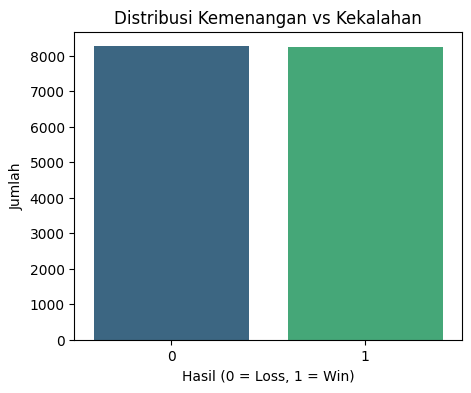

In [23]:
plt.figure(figsize=(5, 4))
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title("Distribusi Kemenangan vs Kekalahan")
plt.xlabel("Hasil (0 = Loss, 1 = Win)")
plt.ylabel("Jumlah")
plt.show()

**RATA-RATA POIN**

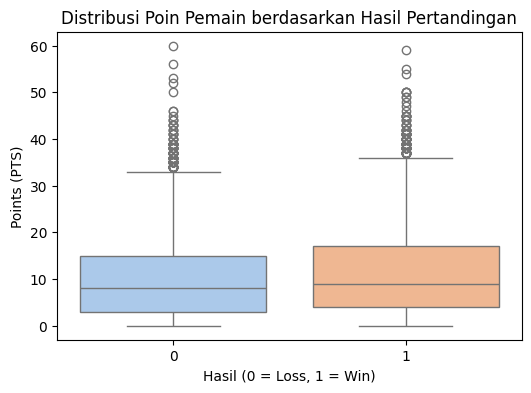

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Res', y='PTS', data=df_clean, hue='Res', palette='pastel', legend=False)
plt.title("Distribusi Poin Pemain berdasarkan Hasil Pertandingan")
plt.xlabel("Hasil (0 = Loss, 1 = Win)")
plt.ylabel("Points (PTS)")
plt.show()

**DISTRIBUSI MENIT BERMAIN**

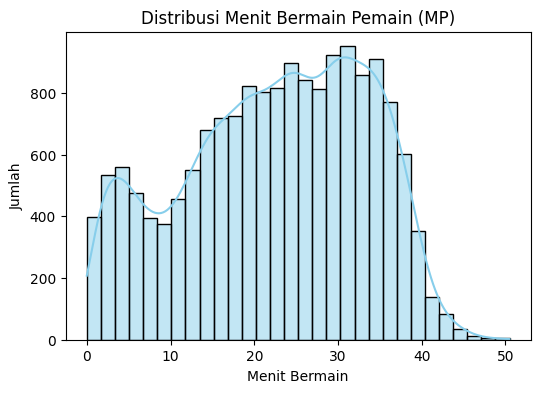

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['MP'], kde=True, bins=30, color='skyblue')
plt.title("Distribusi Menit Bermain Pemain (MP)")
plt.xlabel("Menit Bermain")
plt.ylabel("Jumlah")
plt.show()

**HUBUNGAN ANTARA MENIT BERMAIN & POIN**

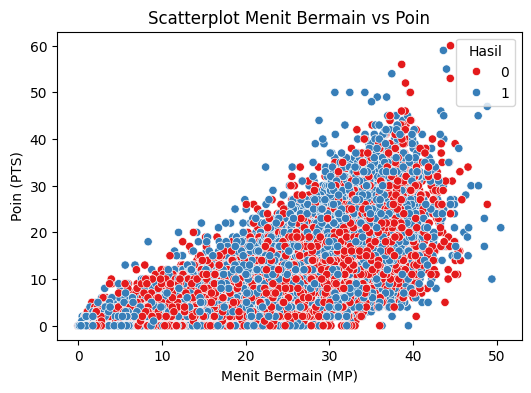

In [15]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_clean, x='MP', y='PTS', hue='Res', palette='Set1')
plt.title("Scatterplot Menit Bermain vs Poin")
plt.xlabel("Menit Bermain (MP)")
plt.ylabel("Poin (PTS)")
plt.legend(title='Hasil')
plt.show()

**RATA-RATA STATISTIK PENTING BERDASARKAN KEMENANGAN**

<Figure size 800x500 with 0 Axes>

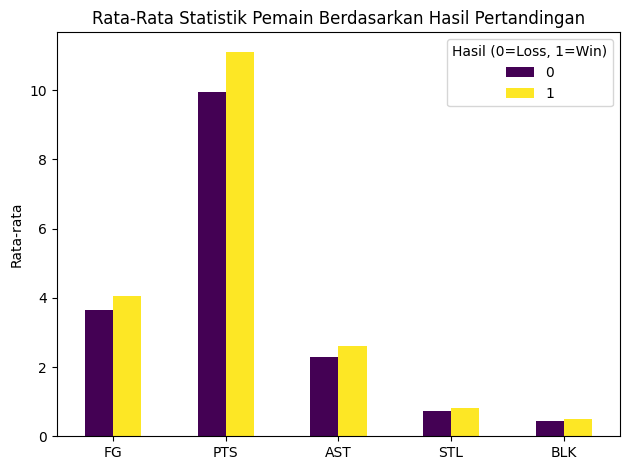

In [16]:
features = ['FG', 'PTS', 'AST', 'STL', 'BLK']
mean_stats = df_clean.groupby('Res')[features].mean().T

plt.figure(figsize=(8, 5))
mean_stats.plot(kind='bar', colormap='viridis')
plt.title("Rata-Rata Statistik Pemain Berdasarkan Hasil Pertandingan")
plt.ylabel("Rata-rata")
plt.xticks(rotation=0)
plt.legend(title='Hasil (0=Loss, 1=Win)')
plt.tight_layout()
plt.show()

**KORELASI ANTAR FITUR**

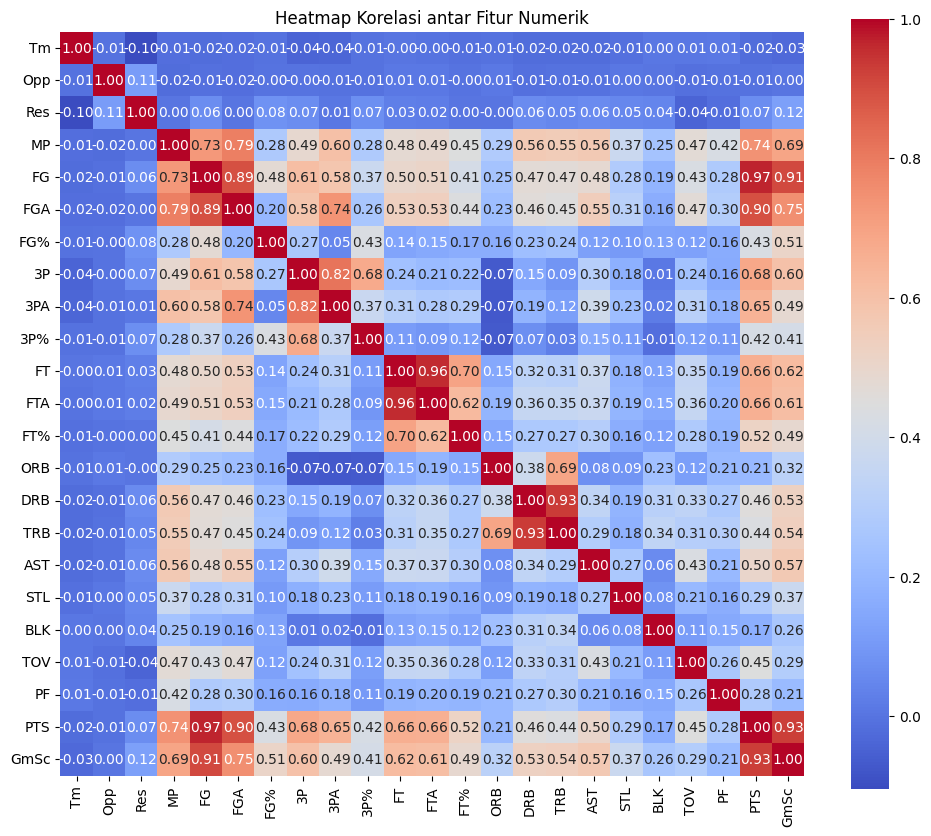

In [17]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.show()

# **TRAINING & EVALUASI MODEL**

**DECISION TREE**

In [18]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report - Decision Tree:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6769603390856797
Classification Report - Decision Tree:
               precision    recall  f1-score   support

           0       0.67      0.68      0.68      1650
           1       0.68      0.67      0.67      1653

    accuracy                           0.68      3303
   macro avg       0.68      0.68      0.68      3303
weighted avg       0.68      0.68      0.68      3303



**RANDOM FOREST**

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6612170753860127
Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.65      0.69      0.67      1650
           1       0.67      0.64      0.65      1653

    accuracy                           0.66      3303
   macro avg       0.66      0.66      0.66      3303
weighted avg       0.66      0.66      0.66      3303



**CROSS VALIDATION SCORE**

In [20]:
cv_score_dt = cross_val_score(dt_model, X_scaled, y, cv=5)
cv_score_rf = cross_val_score(rf_model, X_scaled, y, cv=5)

print("CV Score Decision Tree:", cv_score_dt.mean())
print("CV Score Random Forest:", cv_score_rf.mean())

CV Score Decision Tree: 0.5843611510414058
CV Score Random Forest: 0.6395335408058272


**VISUALISASI CONFUSION MATRIX**

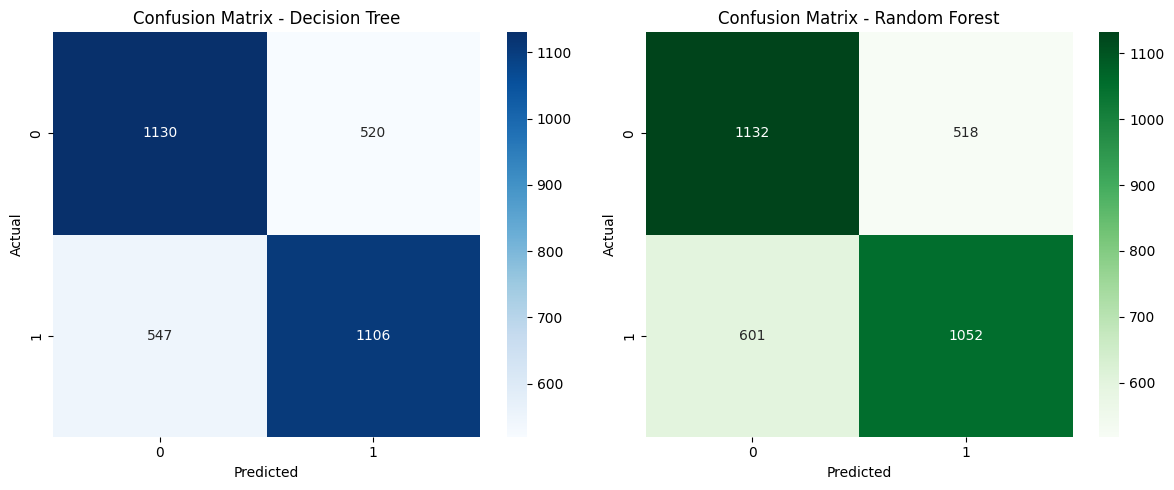

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

**FEATURE IMPORTANCE**

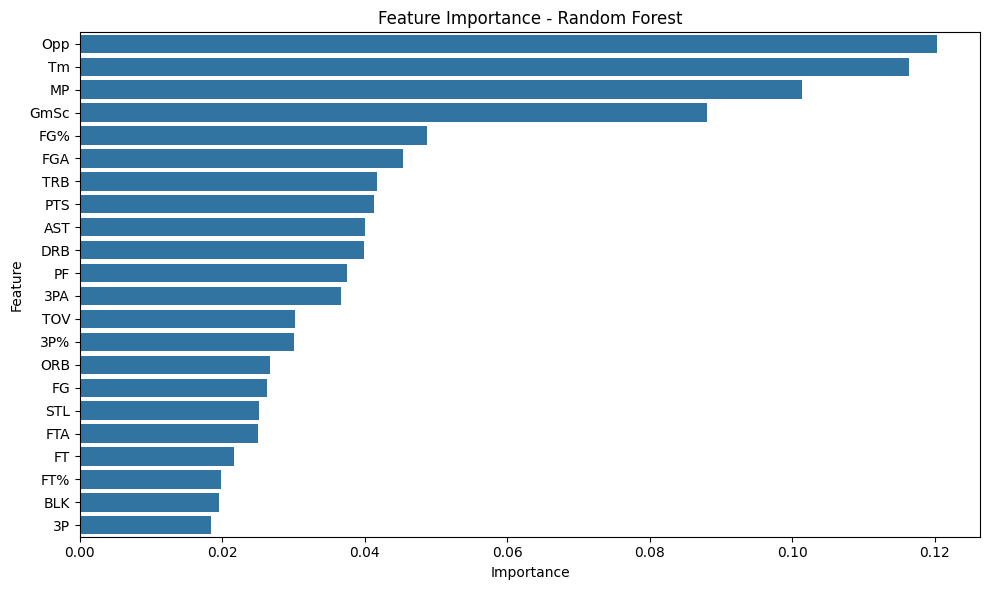

In [22]:
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **DEPLOYMENT**

**PRA DEPLOYMENT**

In [26]:
df_clean.to_csv("nba_cleaned_dataset.csv", index=False)

In [29]:
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [30]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [37]:
print("Decision Tree - Train Accuracy:", dt_model.score(X_train, y_train))
print("Random Forest - Train Accuracy:", rf_model.score(X_train, y_train))

Decision Tree - Train Accuracy: 1.0
Random Forest - Train Accuracy: 1.0
